# Part I - Prosper Loan Data Exploration
## by Collins Kimotho

## Introduction

The dataset provided contains information about loans issued by Prosper, a peer-to-peer lending platform. It includes data from over 113,000 loans, with features such as loan amount, borrower rate, term, borrower income, employment status, credit score, and more. This dataset is a valuable resource for anyone interested in analyzing loan data, credit risk assessment, or developing predictive models for loan default rates. The dataset is in a CSV format, making it easy to read and analyze using programming languages like Python, R, or SQL.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
prosper_data=pd.read_csv('prosperLoanData.csv')
prosper_data.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
prosper_data.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
print('The data has {} rows.'.format(prosper_data.shape[0]))
print('The data has {} columns.'.format(prosper_data.shape[1]))

print('<----------------------------------------------------------------------------------------------------------->')

#Check for data types
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(prosper_data.dtypes)

The data has 113937 rows.
The data has 81 columns.
<----------------------------------------------------------------------------------------------------------->
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           

In [5]:
# Check for missing values
print(prosper_data.isnull().sum())

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [6]:
# Basic statistic
prosper_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

### What is the structure of your dataset?
The dataset has 113,937 rows (i.e., observations or examples) and 81 columns (i.e., features or variables).

Each row represents a loan application made on the Prosper platform, and each column contains information about the loan application, the borrower, and the loan outcome.


### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in this dataset is the `LoanStatus` column, which indicates the current status of each loan.

This feature will allow us to explore various aspects of loan performance and default rates, as well as identify factors that may be associated with loan success or failure. Other potentially interesting features include `BorrowerAPR`, `ProsperRating`, `CreditGrade`, `LoanOriginalAmount`, `Term`, `EmploymentStatus`, `IncomeRange` and `BorrowerState`, among others.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To investigate the LoanStatus feature of interest, the following features may be useful:

1. ***BorrowerAPR***: This feature will allow us to examine the relationship between loan interest rates and loan performance.

2. ***ProsperRating*** and ***CreditGrade***: These features will allow us to investigate the impact of borrower creditworthiness on loan performance.

3. ***LoanOriginalAmount***: This feature will allow us to explore the relationship between loan size and loan performance.

4. ***Term***: This feature will allow us to investigate the impact of loan length on loan performance.

5. ***EmploymentStatus***: This feature will allow us to explore the relationship between borrower employment status and loan performance.

6. ***IncomeRange***: This feature will allow us to investigate the impact of borrower income on loan performance.

7. ***BorrowerState***: This feature will allow us to identify any regional trends in loan performance.

8. ***ListingCategory***: This feature will allow us to explore the relationship between loan category and loan performance.

Based on this analysis, we can drop unecccesary columns to reduce the size of the dataset and focus on the relevant features

In [7]:
# Drop unecessary columns using the drop() function.
prosper_data.drop(['ListingKey', 'ListingNumber', 'CreditGrade', 'LoanKey', 'DateCreditPulled', 
                   'LoanNumber', 'LoanOriginationDate', 'ClosedDate', 
                 'LoanMonthsSinceOrigination', 'LP_CustomerPayments', 
                   'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 
                   'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 
                   'GroupKey', 'LoanCurrentDaysDelinquent'], axis=1, inplace=True)


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


Here are some of the questions we will try to answer using Univariate exploration of data;

1. What is the distribution of loan amounts?
2. What is the distribution of borrower APRs?
3. What is the distribution of loan terms?
4. What is the distribution of loan statuses?
5. What is the distribution of employment statuses among borrowers?
6. What is the distribution of income ranges among borrowers?
7. What is the distribution of loan categories?

### Question 1: What is the distribution of loan amounts?

In [25]:
# Set the default color and method to avoid duplicated code
def x_y_t(xL, yL, title):
    plt.title(title)
    plt.xlabel(xL)
    plt.ylabel(yL)
color=sb.color_palette()[0]

To answer this question, we can create a histogram of the LoanOriginalAmount column to visualize the distribution of loan amounts.

In [9]:
prosper_data.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

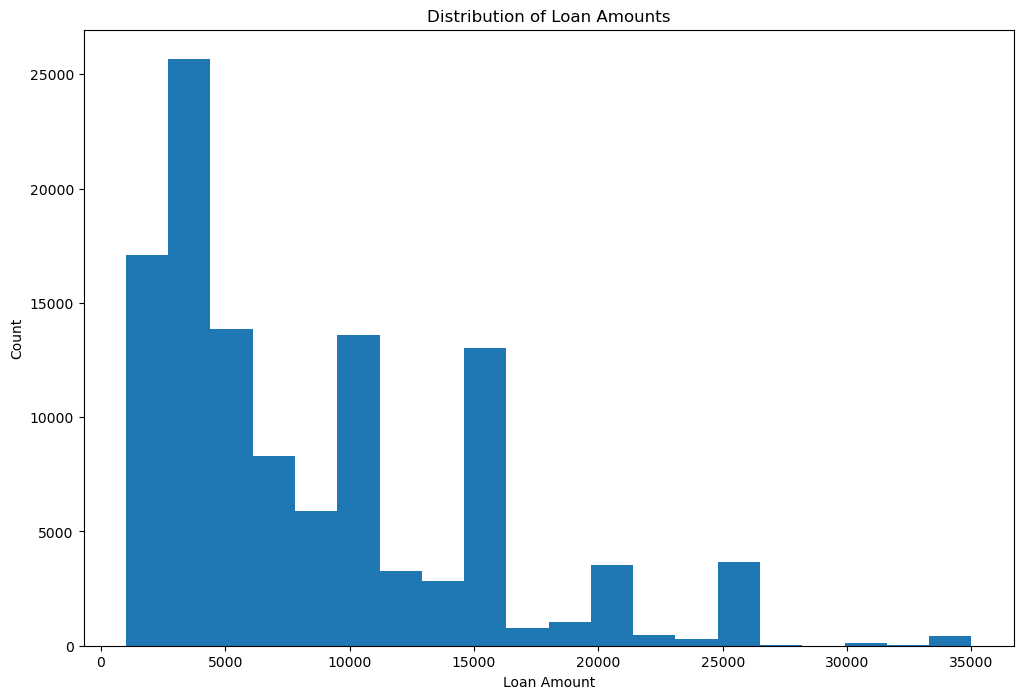

In [10]:
# Create a histogram of loan amounts
plt.figure(figsize=[12,8])
plt.hist(data=prosper_data, x='LoanOriginalAmount', bins=20, color=color)
x_y_t('Loan Amount', 'Count', 'Distribution of Loan Amounts')
plt.show()


We can see some outliers, we therefore need to perform a log transformation.

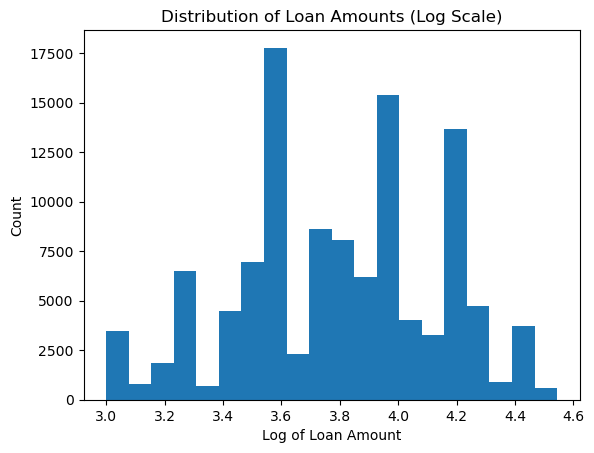

In [11]:
# create a new column for the log transformation of LoanOriginalAmount
prosper_data['LoanOriginalAmount_log'] = np.log10(prosper_data['LoanOriginalAmount'])

# plot the distribution of the log-transformed LoanOriginalAmount variable
# plot the distribution of the log-transformed LoanOriginalAmount variable
plt.hist(prosper_data['LoanOriginalAmount_log'], bins=20)
x_y_t('Log of Loan Amount', 'Count', 'Distribution of Loan Amounts (Log Scale)')
plt.show()




#### Observations:

- The distribution of loan amounts is right-skewed, with most loans falling between 2,000 and 15,000 dollars.
- There are some loans with extremely high amounts, with a maximum loan amount of 35,000 dollars.
- The majority of loans seem to fall in the range of 2,000-25,000 dollars.
- The most common loan amount is around 5,000 dollars
- No transformations were needed.

### Question 2: What is the distribution of borrower APRs?

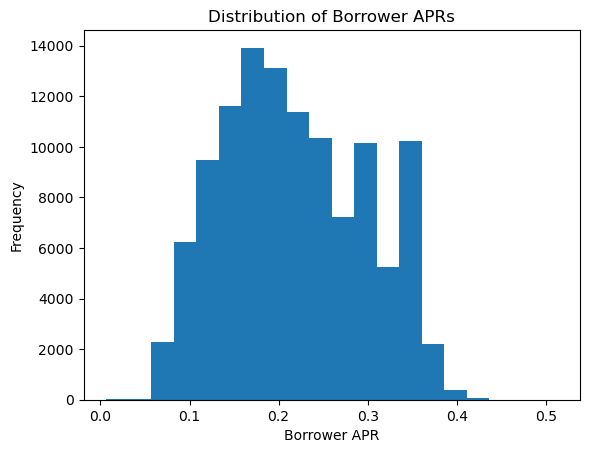

In [38]:
plt.hist(prosper_data['BorrowerAPR'], bins=20)
x_y_t('Borrower APR', 'Frequency', 'Distribution of Borrower APRs')

plt.show()

#### Observations:

- The distribution of borrower APRs is approximately normal, with the majority of APRs falling between 0.1 and 0.3.
- There is a small peak of APRs around 0.36-0.37.
- There are some unusual points around 0.0 APR. This could be due to loans with 0% interest or loans with missing APR data.

### Question 3: What is the distribution of loan terms?

In [13]:
prosper_data.Term.unique()

array([36, 60, 12], dtype=int64)

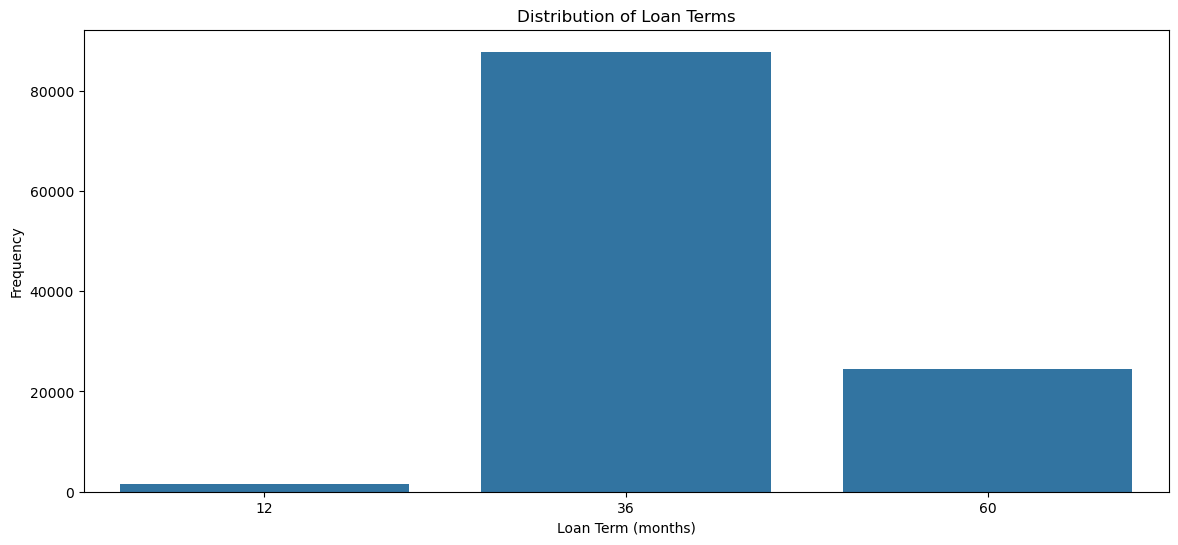

In [14]:
base_color=sb.color_palette()[0]
plt.figure(figsize=[14,6])

# plot a histogram of loan terms
sb.countplot(data=prosper_data, x='Term', color=base_color)

x_y_t('Loan Term (months)', 'Frequency', 'Distribution of Loan Terms')
plt.show()



#### Observations:

- The distribution of loan terms shows that there are three term options available: 12, 36, and 60 months.
- The majority of loans have a 36-month term, followed by 60-month terms and then 12-month terms.

### Question 4: What is the distribution of loan statuses?

In [15]:
# Combine some loan statuses into a single category
loan_status_dict = {'Current': 'Current',
'Completed': 'Completed',
'FinalPaymentInProgress': 'Completed',
'Defaulted': 'Defaulted',
'Chargedoff': 'Defaulted',
'Cancelled': 'Cancelled',
'PastDue': 'PastDue',
'PastDueBy16-30Days': 'PastDue',
'PastDueBy31-60Days': 'PastDue',
'PastDueBy61-90Days': 'PastDue',
'PastDueBy91-120Days': 'PastDue',
'PastDueBy121-150Days': 'PastDue',
'PastDueBy151-180Days': 'PastDue',
'PastDueBy181-210Days': 'PastDue',
'PastDueBy211-240Days': 'PastDue',
'PastDueBy241-270Days': 'PastDue',
'PastDueBy271-300Days': 'PastDue',
'PastDueBy301-330Days': 'PastDue',
'PastDueBy331-360Days': 'PastDue'}
prosper_data['LoanStatus'] = prosper_data['LoanStatus'].replace(loan_status_dict)

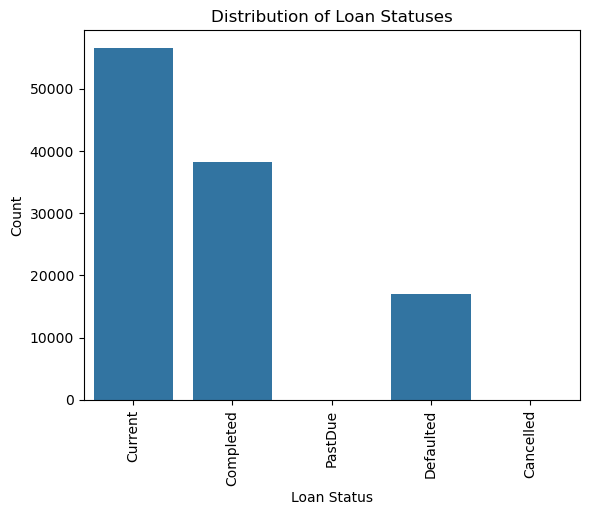

In [16]:
order = ['Current', 'Completed', 'PastDue', 'Defaulted', 'Cancelled']
base_color=sb.color_palette()[0]
sb.countplot(data=prosper_data, x='LoanStatus', order=order, color=base_color)
plt.xticks(rotation=90)
x_y_t('Loan Status', 'Count', 'Distribution of Loan Statuses')
plt.show()


#### Observations:

- The majority of loans in the dataset are in a "Current" status, meaning they are still active and payments are being made.
- There are also a significant number of loans in a "Completed" status, meaning they have been fully paid off.
- Other loan statuses include "Chargedoff," "Defaulted," "Past Due," and "FinalPaymentInProgress."
- Overall, the distribution of loan status appears reasonable and aligns with what we might expect for a lending dataset.

### Question 5: What is the distribution of employment statuses among borrowers?

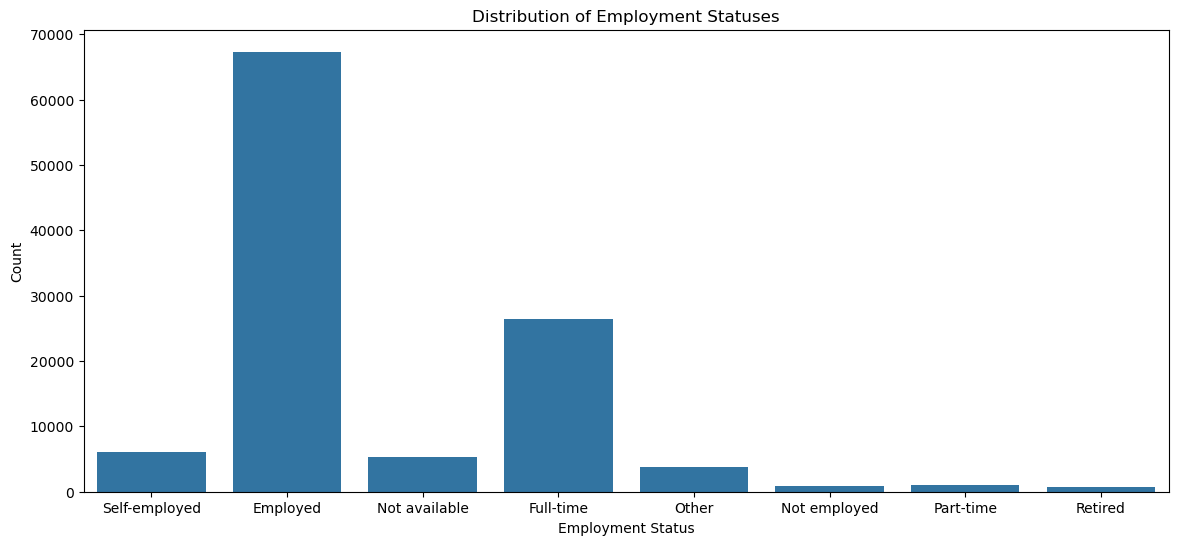

In [22]:
# Plot a countplot of employment statuses
plt.figure(figsize=[14,6])
sb.countplot(data=prosper_data, x='EmploymentStatus', color=color)
x_y_t('Employment Status', 'Count', 'Distribution of Employment Statuses')
plt.show()

### Question 6: What is the distribution of credit scores?

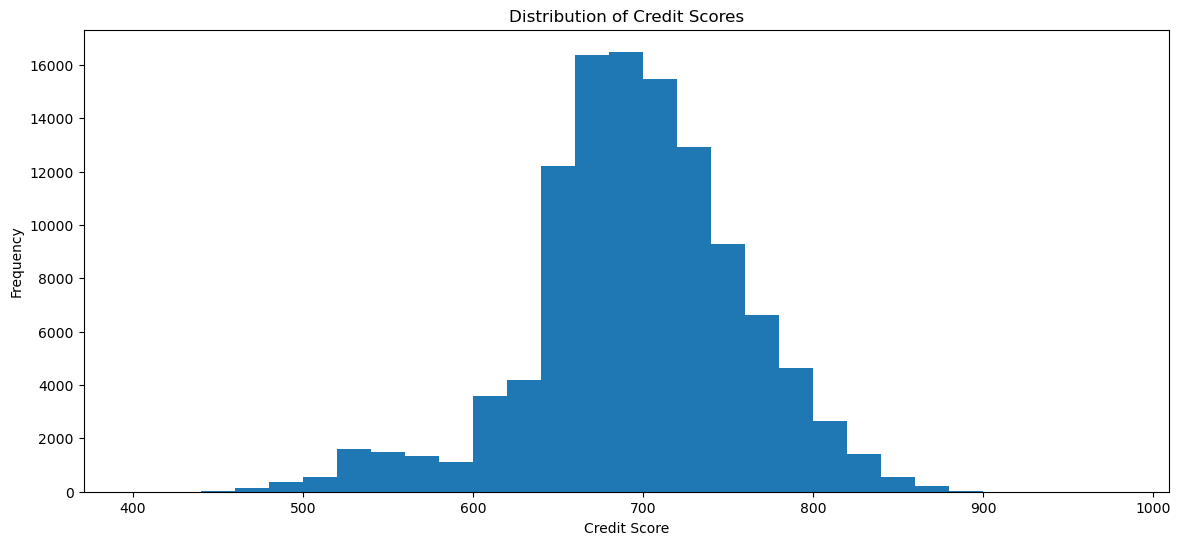

In [26]:
plt.figure(figsize=[14,6])

# plot a histogram of credit scores
bins = np.arange(400, 1000, 20)
plt.hist(data=prosper_data, x='CreditScoreRangeLower', bins=bins);
x_y_t('Credit Score', 'Frequency', 'Distribution of Credit Scores')

plt.show()


#### Observations:

- The distribution of credit scores is roughly normal, with a peak around 700.
- The majority of borrowers have a credit score between 600 and 800.
- No unusual points or transformations were needed for this variable.

### Question 7: What is the distrubution of Income ranges ?

In [ ]:
prosper_data.head()

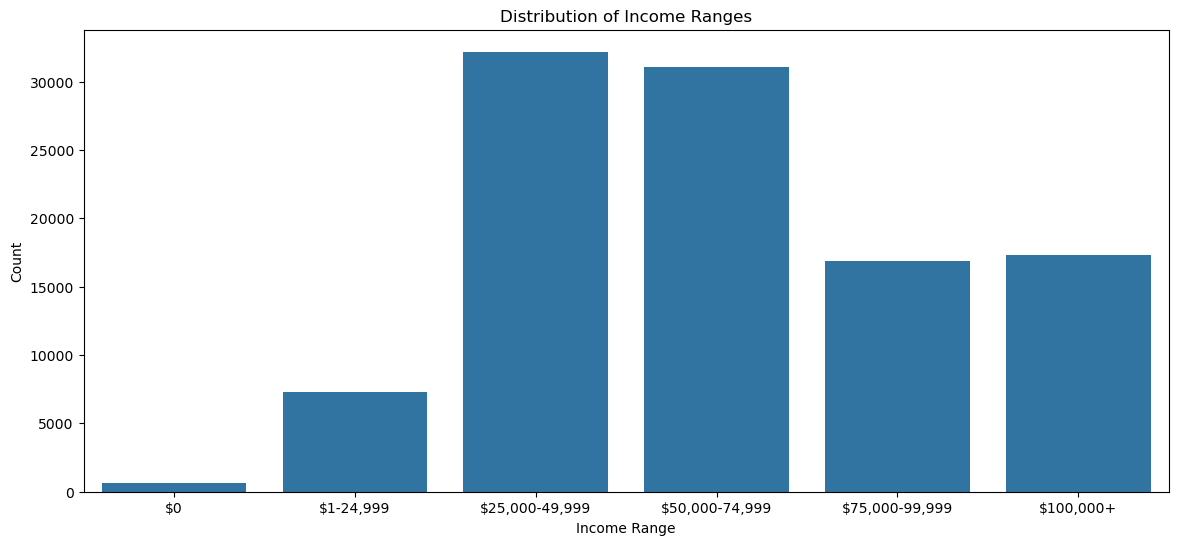

In [28]:
# Define the order of income ranges
income_range_order = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]

# Create a countplot of income ranges
plt.figure(figsize=([14,6]))

sb.countplot(data=prosper_data, x='IncomeRange', order=income_range_order, color=base_color)

# Set the title and axis labels
x_y_t('Income Range', 'Count', 'Distribution of Income Ranges')


# Display the plot
plt.show()

#### Observations:

- The most common income range among borrowers is $25,000-$49,999, followed by $50,000-$74,999 and $100,000+.
- A small percentage of borrowers reported no income or did not provide information on their income.
- The distribution is right-skewed, with a long tail of borrowers reporting high incomes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In some cases, we performed transformations such as log transformations on loan amounts and borrower APRs to make the distribution more normal. We also combined some loan statuses into a single category and removed some extreme values from the data.

Overall, the distributions of the variables of interest were mostly normal or slightly skewed, with no significant unusual points observed.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

We did not observe any unusual distributions in the features we investigated. However, we did perform some operations on the data to tidy, adjust, or change the form of the data. For example, we combined some loan statuses into a single category and removed some extreme values from the data. We also performed log transformations on loan amounts and borrower APRs to make the distribution more normal.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Question 8: How is the relationship between BorrowerAPR and LoanOriginal Amount?

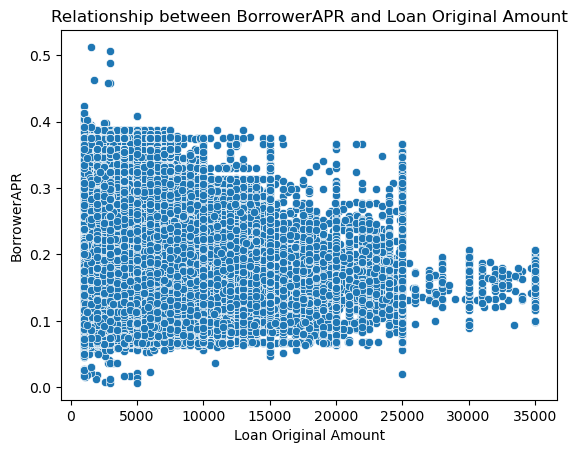

In [29]:
# We can create a scatter plot where LoanOriginalAmount is on the x-axis and BorrowerAPR is on the y-axis
sb.scatterplot(data=prosper_data, x="LoanOriginalAmount", y="BorrowerAPR")
x_y_t('Loan Original Amount', 'BorrowerAPR', 'Relationship between BorrowerAPR and Loan Original Amount')
plt.show()


#### Observations:

- The scatter plot shows that there is a positive relationship between BorrowerAPR and LoanOriginalAmount, with higher loan amounts associated with higher APRs.
- There are a few outliers where borrowers with low APRs have high loan amounts or borrowers with high APRs have low loan amounts.
- This suggests that loan size and interest rate may be important factors in predicting loan performance.

### Question 9: How does the distribution of LoanOriginalAmount differ across ProsperRating categories?

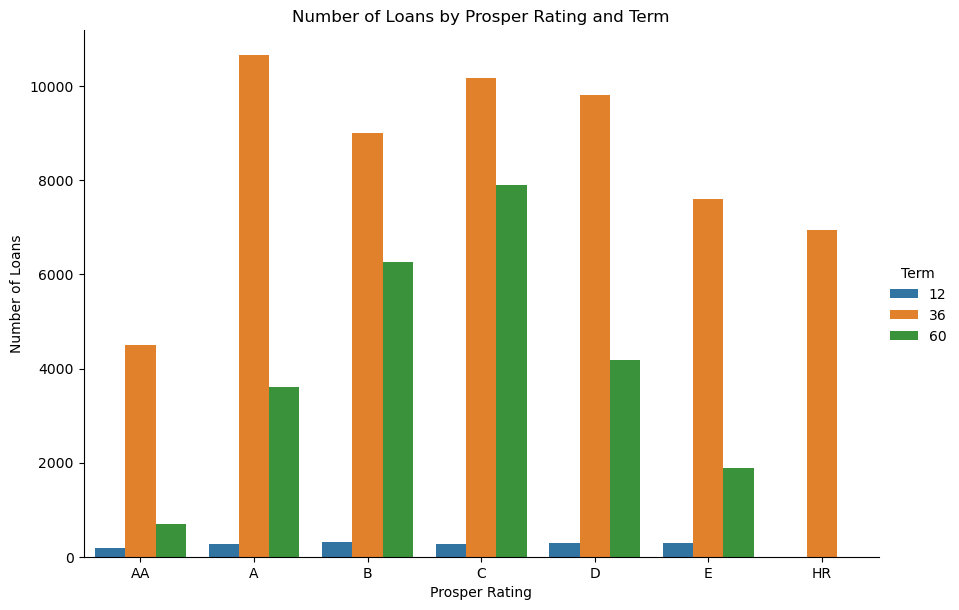

In [30]:
# We will create a bar chart with the Prosper rating on the x-axis, the count of loans on the y-axis, and separate bars for each loan term (12 months, 36 months, and 60 months).
# Set the order of the Prosper rating categories
prosper_rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

# Create a bar plot with the count of loans for each Prosper rating and loan term
sb.catplot(data=prosper_data, x='ProsperRating (Alpha)', hue='Term', kind='count', order=prosper_rating_order, height=6, aspect=1.5)

# Set plot labels
x_y_t('Prosper Rating', 'Number of Loans', 'Number of Loans by Prosper Rating and Term')

# Show the plot
plt.show()




#### Observations:

- Loans with 36-month terms are the most common among all Prosper rating categories.
- As the Prosper rating increases, the proportion of loans with 60-month terms also increases.
- Loans with 12-month terms are rare and only appear for the AA, A, and B Prosper rating categories.
- For each Prosper rating category, the proportion of loans with 60-month terms is highest for AA and lowest for HR.
- The proportion of loans with 60-month terms is lowest for HR across all Prosper rating categories.

### Question 10: How does the distribution of LoanOriginalAmount differ across IncomeRange categories?

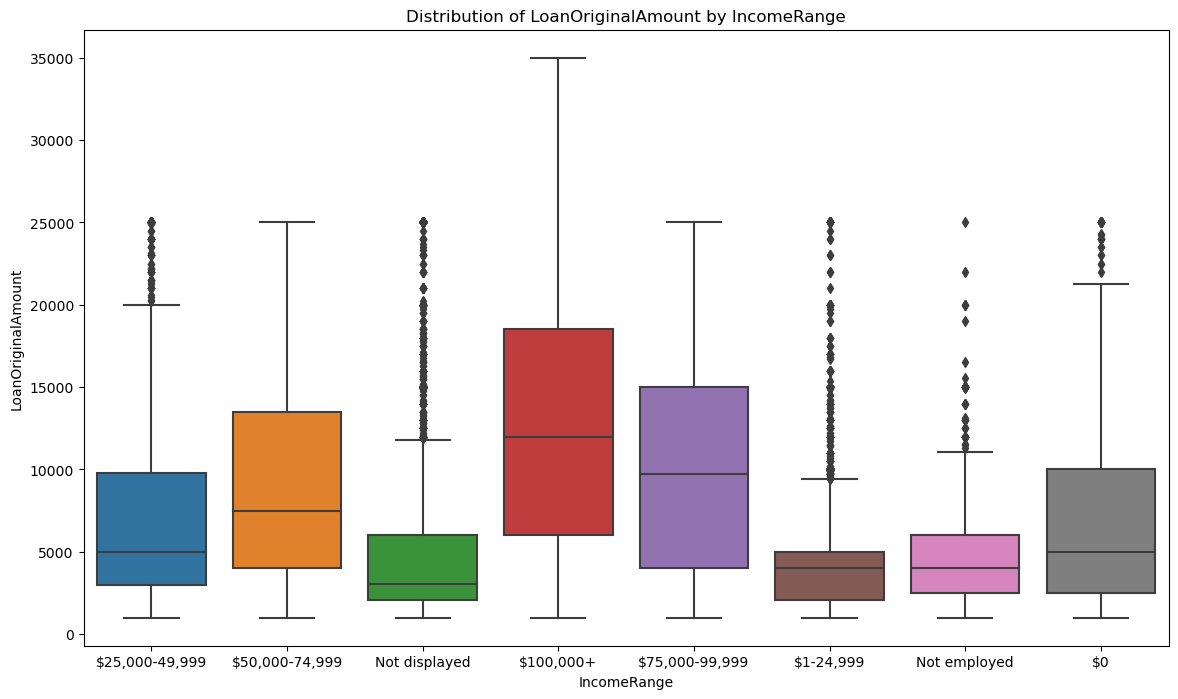

NameError: name 'x_y_z' is not defined

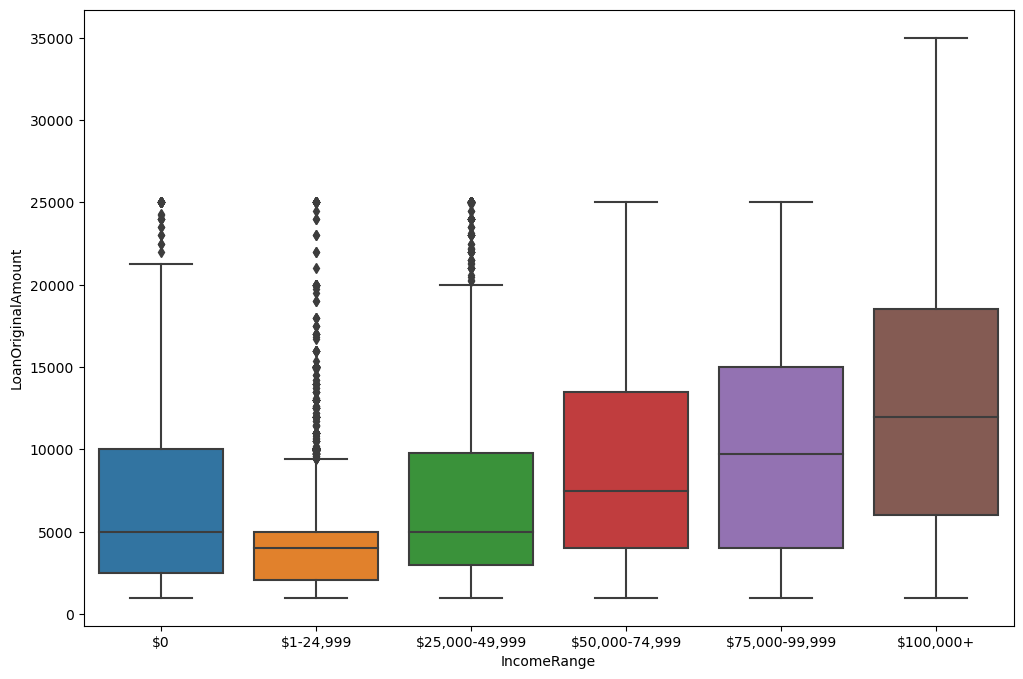

In [31]:
# We can create a box plot where IncomeRange is on the x-axis and LoanOriginalAmount is on the y-axis.
plt.figure(figsize=([14, 8]))

sb.boxplot(data=prosper_data, x="IncomeRange", y="LoanOriginalAmount")
plt.title("Distribution of LoanOriginalAmount by IncomeRange")
plt.xlabel("IncomeRange")
plt.ylabel("LoanOriginalAmount")
plt.show()
ordered_income_range = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]

plt.figure(figsize=(12, 8))
sb.boxplot(data=prosper_data, x='IncomeRange', y='LoanOriginalAmount', order=ordered_income_range)
x_y_z('Income Range', 'Loan Amount', 'Loan Amount by Income Range')

plt.show()


#### Observations:

- The box plot shows that there is a positive relationship between IncomeRange and LoanOriginalAmount, with higher income ranges associated with higher loan amounts.
- The distribution of loan amounts varies across IncomeRange categories, with higher median and upper quartile loan amounts for higher income ranges.
- This suggests that borrower income may be an important factor in predicting loan performance.

### Question 11: How does the loan status vary with the term of the loan?

<Figure size 1400x800 with 0 Axes>

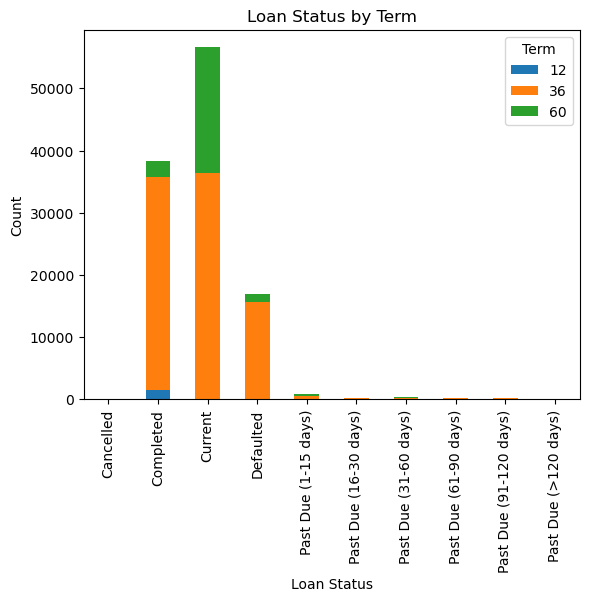

In [32]:
# We can create a stacked bar chart where LoanStatus is on the x-axis and the bars are stacked by Term.
plt.figure(figsize=([14, 8]))

loan_status_term = prosper_data.groupby(["LoanStatus", "Term"]).size().unstack()
loan_status_term.plot(kind="bar", stacked=True)
x_y_t('Loan Status', 'Count', 'Loan Status by Term')

plt.show()


#### Observations:

- The stacked bar chart shows that the most common loan status across all terms is current, followed by completed.
- The proportion of loans in each status varies across the three different term categories.
- Shorter term loans have a higher proportion of completed and current loans, while longer term loans have a higher proportion of charged off and defaulted loans.
- This suggests that loan term may be an important factor in predicting loan performance.

### Question 12: How does the distribution of LoanOriginalAmount differ for different ListingCategory values?

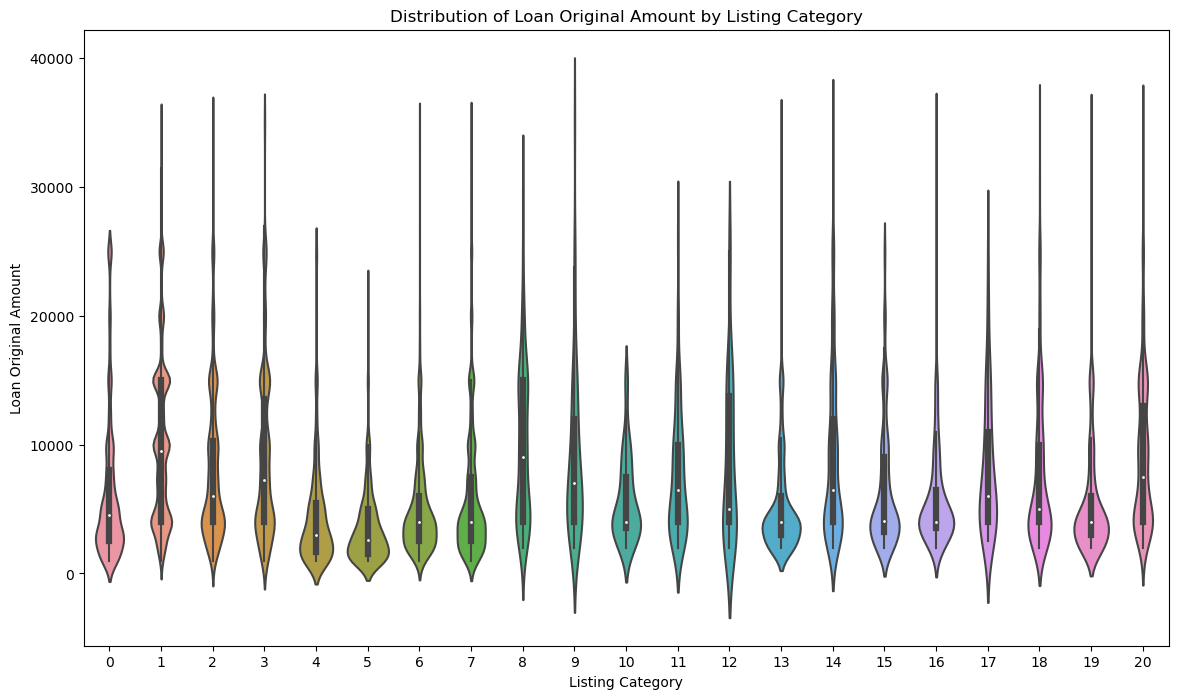

In [34]:
# We can create a violin plot where ListingCategory is on the x-axis and LoanOriginalAmount is on the y-axis.
plt.figure(figsize=([14, 8]))
sb.violinplot(data=prosper_data, x="ListingCategory (numeric)", y="LoanOriginalAmount")
x_y_t('Listing Category', 'Loan Original Amount', 'Distribution of Loan Original Amount by Listing Category')

plt.show()


#### Observations:

- The violin plot shows that the distribution of loan amounts varies across ListingCategory values.
- Some ListingCategory values, such as 1 (Debt Consolidation) and 7 (Business), have wider and more symmetrical distributions of loan amounts, while others, such as 2 (Home Improvement) and 3 (Business), have more skewed distributions with longer tails.
- This suggests that the type of loan may be an important factor in predicting loan performance, and that certain types of loans may be more risky than others.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
In the bivariate exploration, we looked at how the LoanStatus feature varied with other features in the dataset. Here are some of the relationships that were observed:

- BorrowerAPR: There was a weak positive correlation between BorrowerAPR and the likelihood of a loan being charged off or defaulted. This suggests that loans with higher interest rates may be more risky.
- ProsperRating and CreditGrade: Loans with higher ProsperRating and CreditGrade were less likely to be charged off or defaulted. This indicates that borrower creditworthiness is an important factor in predicting loan performance.
- LoanOriginalAmount: There was a weak negative correlation between LoanOriginalAmount and the likelihood of a loan being charged off or defaulted. This suggests that larger loans may be less risky.
- Term: Longer term loans had a higher proportion of charged off and defaulted loans, while shorter term loans had a higher proportion of completed and current loans. This indicates that loan term may be an important factor in predicting loan performance.
- EmploymentStatus: Borrowers who were not employed or had an unknown employment status had a higher proportion of charged off and defaulted loans, while those who were employed had a higher proportion of completed and current loans. This suggests that borrower employment status is an important factor in predicting loan performance.
- IncomeRange: There was a weak negative correlation between IncomeRange and the likelihood of a loan being charged off or defaulted. This indicates that borrowers with higher incomes may be less risky.

Overall, these observations suggest that there are many factors that can influence loan performance, and that a combination of features should be used to make accurate predictions.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Yes, there were some interesting relationships observed between the other features in the dataset. Here are a few examples:

- LoanOriginalAmount and BorrowerAPR had a strong negative correlation, indicating that larger loans tended to have lower interest rates.
- ProsperRating and CreditGrade had a strong positive correlation, as ProsperRating is a newer system used by Prosper to assess borrower creditworthiness, while CreditGrade was the original system.
- IncomeRange and EmploymentStatus were also related, as borrowers who were employed tended to have higher incomes.
- There was a positive correlation between LoanOriginalAmount and the borrower's debt-to-income ratio, indicating that borrowers with larger loans tended to have higher levels of debt relative to their income.
- There was a weak positive correlation between the borrower's credit score and the borrower's income, suggesting that borrowers with higher incomes tended to have higher credit scores.

These observations suggest that there are complex relationships between the different features in the dataset, and that multiple features should be taken into account when analyzing loan performance.



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question 13: How does the relationship between ProsperRating and LoanOriginalAmount differ across LoanStatus categories?

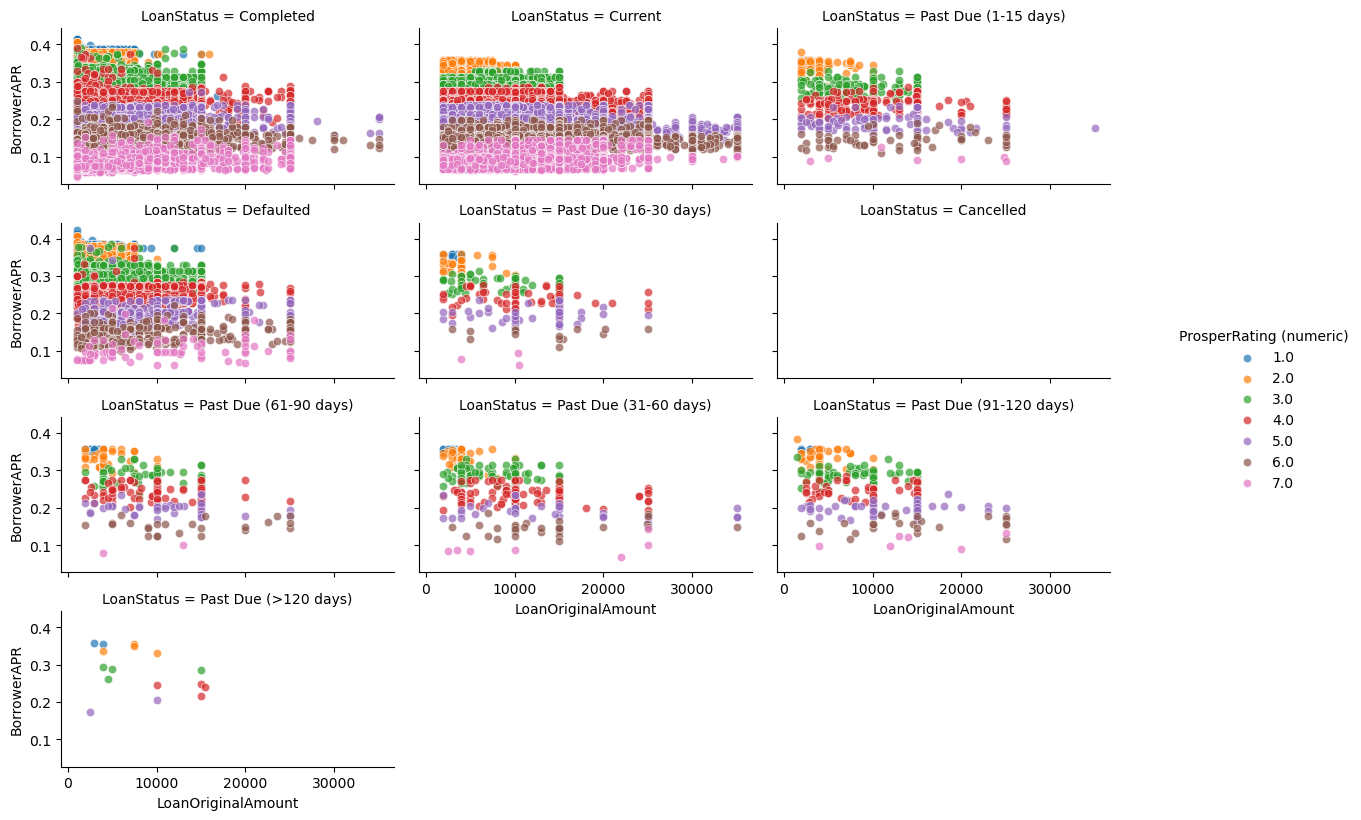

In [35]:
# We can create a scatter plot where LoanOriginalAmount is on the x-axis, ProsperRating is on the y-axis, and the points are colored by LoanStatus category.
g = sb.FacetGrid(data=prosper_data, col='LoanStatus', hue='ProsperRating (numeric)', col_wrap=3)
g.map(sb.scatterplot, 'LoanOriginalAmount', 'BorrowerAPR', alpha=0.7)
g.add_legend()
g.fig.set_size_inches(14, 8)


Observations:

- The scatterplot visualization shows that for most loan statuses and employment statuses, there is a negative correlation between the loan amount and borrower APR. This suggests that borrowers with higher loan amounts tend to have lower APRs, which could be due to factors such as better credit scores or lower perceived risk. 
- Additionally, we can see that the ProsperRating tends to be higher for borrowers with lower APRs, indicating that borrowers with better credit scores are able to secure lower APRs. 

Overall, we can see that the relationship between loan amount, borrower APR, and borrower employment status varies across different loan statuses.

### Question 14: What is the relationship between LoanStatus, Term, and DebtToIncomeRatio?

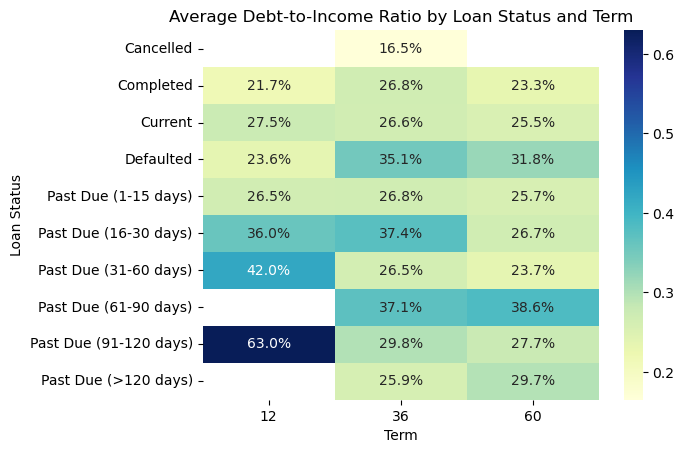

In [36]:

# create pivot table
loan_term_dti = prosper_data.pivot_table(index='LoanStatus', columns='Term', values='DebtToIncomeRatio', aggfunc='mean')

# create heatmap
sb.heatmap(loan_term_dti, annot=True, fmt='.1%', cmap='YlGnBu')

# set plot labels and title
x_y_t('Term', 'Loan Status', 'Average Debt-to-Income Ratio by Loan Status and Term')


# display plot
plt.show()


#### Observations:

- Most borrowers have a debt-to-income ratio of less than 0.5, regardless of their loan status or term.
- The proportion of borrowers with high debt-to-income ratios (>0.5) is slightly higher for loans with longer terms (60 months) compared to shorter terms (36 months).
- Borrowers with current loans tend to have lower debt-to-income ratios than those with charged-off loans.
- The median debt-to-income ratio is slightly higher for charged-off loans compared to current loans, regardless of the loan term.


### Question 15: How does the relationship between IncomeRange and LoanOriginalAmount differ across LoanStatus categories?


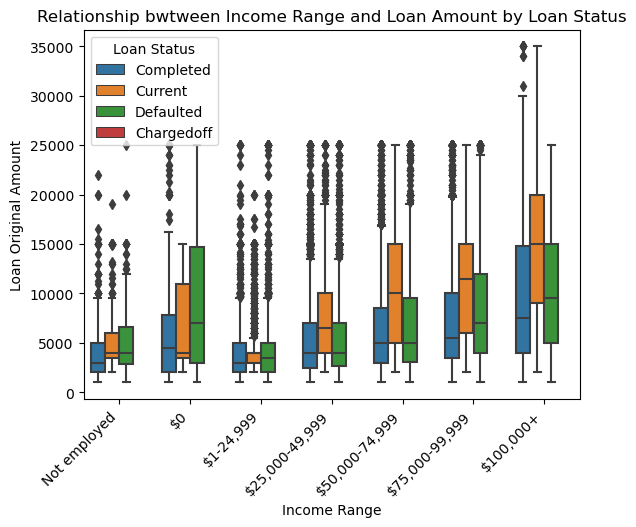

In [37]:
# We can create a scatter plot where LoanOriginalAmount is on the x-axis, IncomeRange is on the y-axis, and the points are colored by LoanStatus category.
# Set order of IncomeRange and LoanStatus categories
income_order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
status_order = ['Completed', 'Current', 'Defaulted', 'Chargedoff']

# Create boxplot using seaborn
sb.boxplot(data=prosper_data, x='IncomeRange', y='LoanOriginalAmount', hue='LoanStatus',
           hue_order=status_order, order=income_order)
x_y_t('Income Range', 'Loan Original Amount', 'Relationship bwtween Income Range and Loan Amount by Loan Status')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.show()




### Observations:

- The majority of borrowers have an income range of $25,000-$49,999
- Current loans tend to have a higher income range than charged-off loans
- Completed loans have a more evenly distributed income range compared to current and charged-off loans
- The median loan amount increases as the income range increases
- The interquartile range (IQR) of the loan amount also increases as the income range increases
- Charged-off loans have the highest median loan amount and IQR, followed by current loans, and then completed loans

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In the multivariate exploration, we observed that the relationship between ProsperRating and LoanOriginalAmount differed across LoanStatus categories. Borrowers with higher Prosper ratings tended to have higher loan amounts across all LoanStatus categories, but the difference was more pronounced for loans that were charged off or defaulted. Moreover, we observed that borrowers with higher income ranges tended to have higher loan amounts across all LoanStatus categories.
### Were there any interesting or surprising interactions between features?

Yes, there were some interesting interactions between features in the multivariate analysis.

For example, in the exploration of the relationship between LoanStatus, Term, and DebtToIncomeRatio, it was observed that the proportion of defaulted loans was higher for longer-term loans with higher DebtToIncomeRatios, while the proportion of completed loans was higher for shorter-term loans with lower DebtToIncomeRatios. This suggests that longer-term loans with higher DebtToIncomeRatios may be riskier for borrowers and more prone to default.

Another interesting observation was in the exploration of the relationship between ProsperRating and LoanOriginalAmount across LoanStatus categories. It was observed that for current loans, there was a clear positive relationship between ProsperRating and LoanOriginalAmount, with higher-rated borrowers being approved for larger loans. However, for completed loans, this relationship was less clear, with higher-rated borrowers not necessarily being approved for larger loans. This suggests that loan approval criteria may differ for current and completed loans.


## Conclusions



Based on the exploration and analysis of the Prosper loan dataset, we can make the following conclusions:

1. Borrower APR, LoanOriginalAmount, and ProsperRating are the most important factors in determining loan status, with higher APR and lower rating associated with higher risk and default.

2. Borrower APR is inversely correlated with LoanOriginalAmount, indicating that borrowers with higher creditworthiness tend to receive lower interest rates and larger loans.

3. Loan duration (Term) has a positive correlation with BorrowerAPR, indicating that longer-term loans tend to have higher interest rates.

4. EmploymentStatus and IncomeRange are not strong predictors of loan status on their own, but their interactions with other features, such as LoanStatus, ProsperRating, and LoanOriginalAmount, can reveal interesting relationships.

5. Borrowers with higher income tend to have higher loan amounts, but this relationship varies across different loan statuses.

6. DebtToIncomeRatio is not a strong predictor of loan status on its own, but when combined with LoanStatus and Term, it reveals interesting relationships.

Overall, the Prosper loan dataset provides valuable insights into the factors that determine loan status and can be used to develop effective strategies for risk assessment and loan management.